In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from uncertainties import ufloat

%matplotlib ipympl

In [2]:
def sine_wave(t, a, f, phi, c):
    return a*np.sin(2*np.pi*f*t+phi)+c

# loading data
pulse_freq = 0.5e6      # [Hz]
sample_rate = 1e8       # [Hz]
digitizer_data = np.load(f'/home/icarus/Desktop/clock_sharing_test/sine_waves_{pulse_freq}Hz.npy')
channel0, channel4 = digitizer_data[0][0], digitizer_data[1][0]
channel0_exclude, channel4_exclude = 20000, 200000
"""
t = np.arange(0, channel0.size)/sample_rate
plt.plot(t[::1000]*1e3, channel0[::1000])
plt.xlabel('time (ms)')
plt.ylabel('signal (V)')
plt.show()
"""

"\nt = np.arange(0, channel0.size)/sample_rate\nplt.plot(t[::1000]*1e3, channel0[::1000])\nplt.xlabel('time (ms)')\nplt.ylabel('signal (V)')\nplt.show()\n"

In [3]:
# Excluding noisy portion and curvefitting to find more precise value of frequency
channel0 = channel0[channel0_exclude:]
channel4 = channel4[channel4_exclude:]
t0 = np.arange(channel0_exclude, channel0_exclude+channel0.size)/sample_rate
t4 = np.arange(channel4_exclude, channel4_exclude+channel4.size)/sample_rate

popt0, pcov0 = curve_fit(sine_wave, t0[::5], channel0[::5], p0=(0.3, 500000, 0, 0))
popt4, pcov4 = curve_fit(sine_wave, t4[::5], channel4[::5], p0=(0.3, 500001, 0, 0))

print(f'frequency of channel 0 wave: {popt0[1]} Hz +- {np.sqrt(pcov0[1, 1])} Hz')
print(f'frequency of channel 4 wave: {popt4[1]} Hz +- {np.sqrt(pcov4[1, 1])} Hz')

f0= ufloat(popt0[1], np.sqrt(pcov0[1, 1]))
f4= ufloat(popt4[1], np.sqrt(pcov4[1, 1]))
print(f"Fractional frequency difference: {(f0-f4)/f4}")

"""

# figuring out where the phase difference is pi and 0

phase_dif_pi = np.argwhere(channel0 == -channel4)
phase_dif_0 = np.argwhere(channel0 == channel4)

first_0, first_pi = x[phase_dif_0[0][0]]-5e-3, x[phase_dif_pi[0][0]]-5e-3
delta_T = np.fabs(first_0-first_pi)
delta_f = 1/(2*delta_T)
fractional_dif = delta_f/pulse_freq
print(f"delta_f/f = {round(100*fractional_dif, 2)}%")
"""

frequency of channel 0 wave: 500000.35031440796 Hz +- 7.96978032913706e-08 Hz
frequency of channel 4 wave: 500000.7353616958 Hz +- 6.493858411116277e-08 Hz
Fractional frequency difference: (-7.7009344+/-0.0000021)e-07


'\n\n# figuring out where the phase difference is pi and 0\n\nphase_dif_pi = np.argwhere(channel0 == -channel4)\nphase_dif_0 = np.argwhere(channel0 == channel4)\n\nfirst_0, first_pi = x[phase_dif_0[0][0]]-5e-3, x[phase_dif_pi[0][0]]-5e-3\ndelta_T = np.fabs(first_0-first_pi)\ndelta_f = 1/(2*delta_T)\nfractional_dif = delta_f/pulse_freq\nprint(f"delta_f/f = {round(100*fractional_dif, 2)}%")\n'

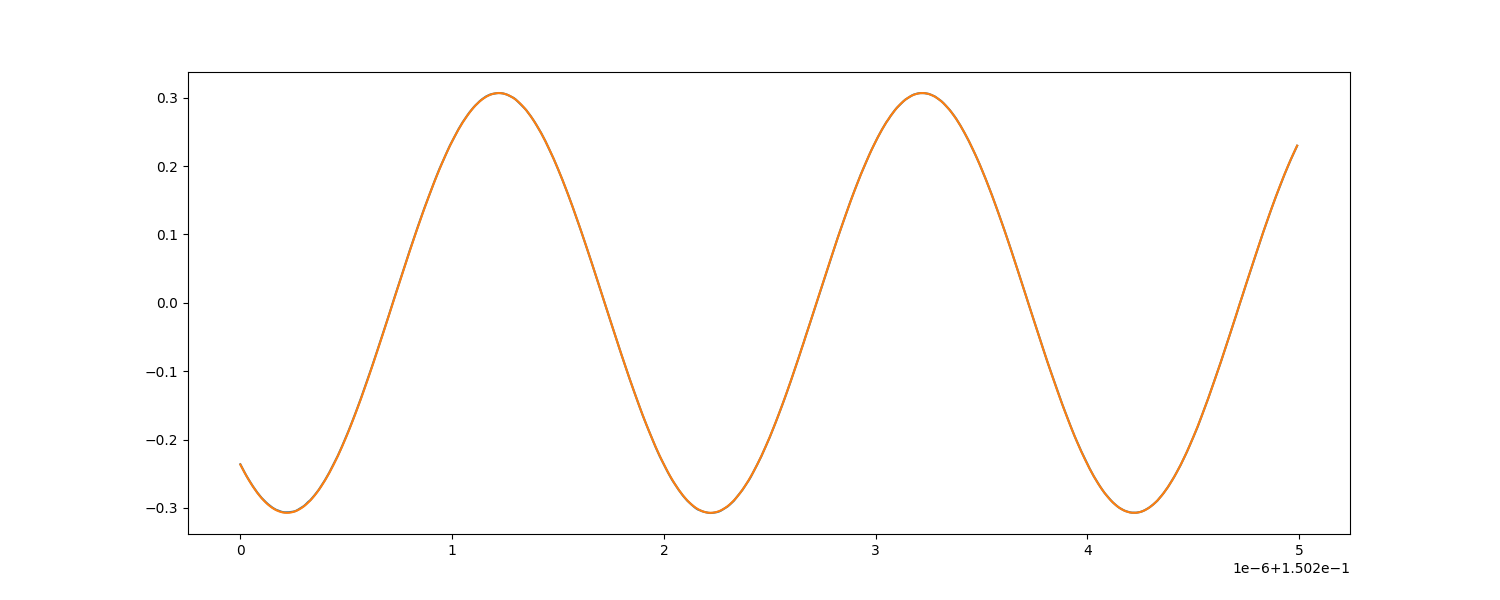

In [64]:
start = 15000000  # 19950 * 5
length = 500
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(t0[start:start+length], channel0[start:start+length])
ax.plot(t0[start:start+length], sine_wave(t0[start:start+length], *popt0))
# ax.plot(t4[start:start+length], channel4[start:start+length])
# ax.plot(t4[start:start+length], sine_wave(t4[start:start+length], *popt4))
plt.show()

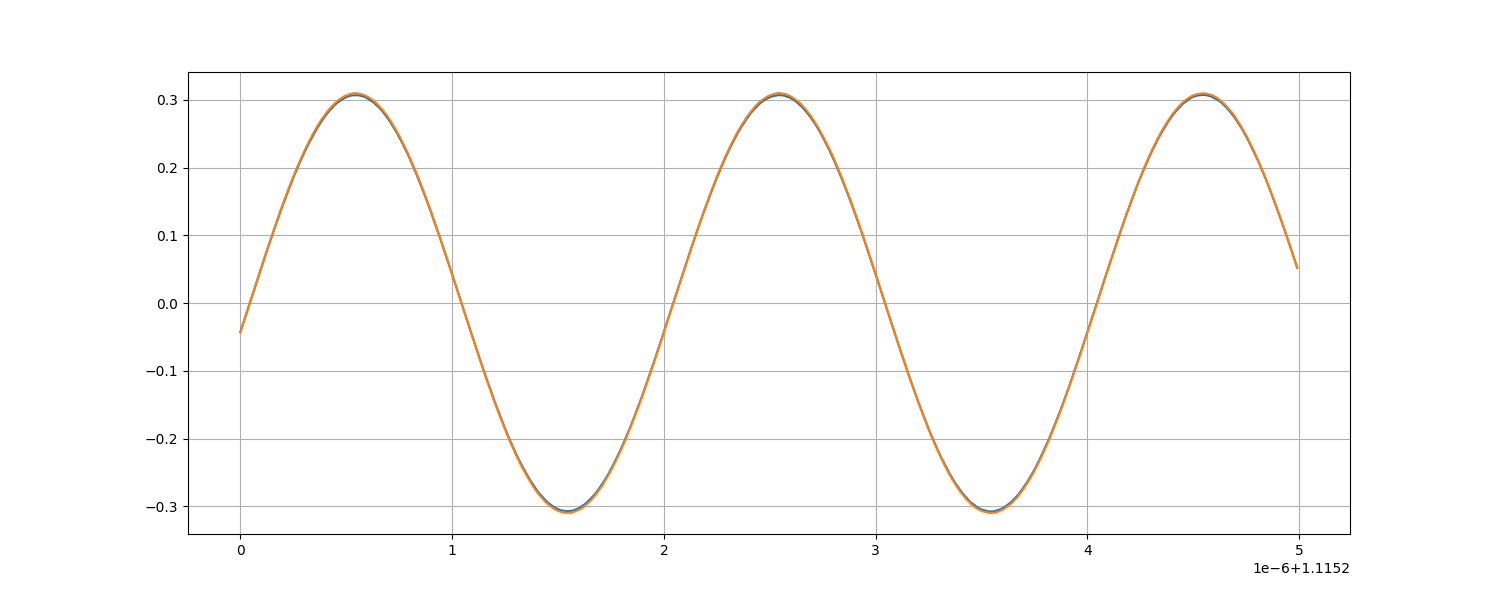

In [88]:
start = 111500000
length = 500
fig, ax = plt.subplots(figsize=(15, 6))
#ax.plot(t0[start:start+length], channel0[start - int(1e8 / 500e3 / 4):start - int(1e8 / 500e3 / 4)+length])
ax.plot(t0[start:start+length], channel0[start:start+length])
ax.plot(t0[start:start+length], channel4[start:start+length])
ax.grid()
plt.show()

In [ ]:
# in agreement - 1.1152 s
# 90 degree offset - 0.4652 s

In [91]:
freq_diff = 1 / (1.1152 - 0.4652) / 4

In [92]:
fractional_freq_diff = freq_diff / 500e3
print(fractional_freq_diff)

7.692307692307694e-07


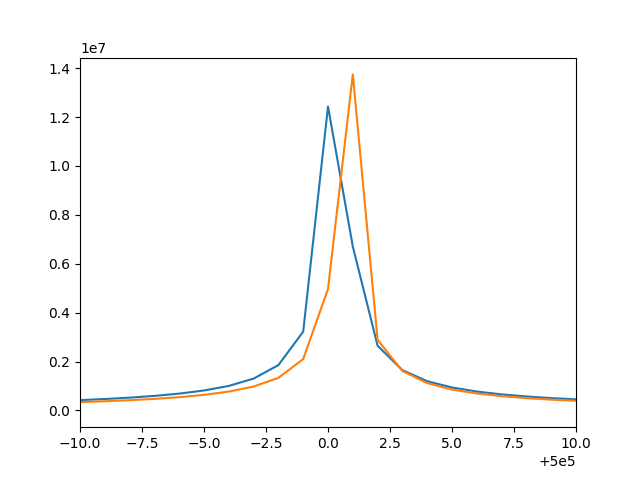

In [71]:
fft_samples = 100000000
fig, ax = plt.subplots()
ax.plot(np.fft.rfftfreq(fft_samples, 1/sample_rate), np.abs(np.fft.rfft(channel0[::1][start:start+fft_samples])))
ax.plot(np.fft.rfftfreq(fft_samples, 1/sample_rate), np.abs(np.fft.rfft(channel4[::1][start:start+fft_samples])))
ax.set_xlim(500000 - 10, 500000 + 10)
plt.show()